In [25]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from multiply_connected_pipe import Boundary, MultiplyConnectedPipeFromBoundaries

from curve import *
from pipe import *
from pipe.smooth_pipe import SmoothPipe
from utils import *

from matplotlib.path import Path


In [26]:
p1 = pt(-8,-2)
p2 = pt(8,-2)
p3 = pt(8,2)
p4 = pt(-8,2)

pts = [p1, p2, p3, p4]

l1 = Line
l2 = Cap
l3 = Line
l4 = Cap

ls = [l1, l2, l3, l4]

In [27]:
pipe = SmoothPipe(pts, ls)
pipe.build_geometry()
b1 = Boundary(pipe.curves)

In [28]:
orientation = -1
c1 = Circle(0.5, pt(0,0), orientation)
c2 = Circle(-.2, pt(-1,-1), orientation)
c3 = Circle(-.2, pt(1,1), orientation)

c = [c1,c2,c3]
# c = [c1]
[ci.build() for ci in c];

In [29]:
bs = [Boundary([ci]) for ci in c]
bs.append(b1)

In [30]:
the_pipe = MultiplyConnectedPipeFromBoundaries(bs)

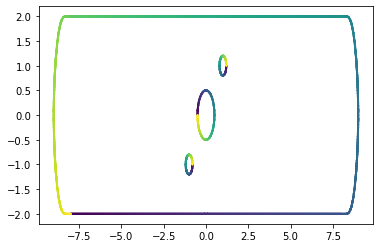

In [31]:
for b in the_pipe.boundaries:
    plt.scatter(b.t.real, b.t.imag, c=b.a,s=1)

In [32]:
the_pipe.build()

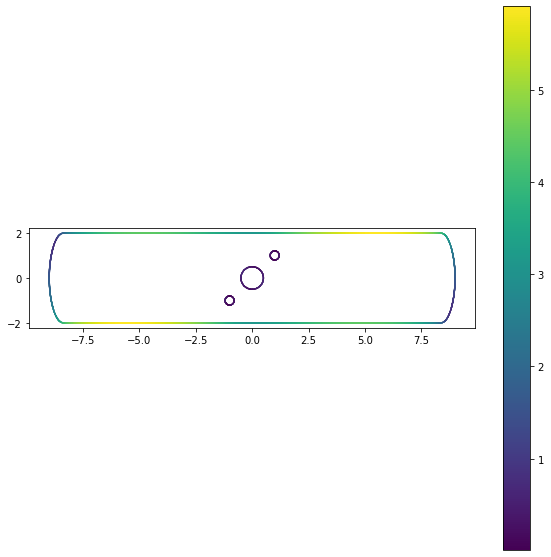

In [33]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0])))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

Text(0.5, 0.98, 'color=poiseuille boundary value')

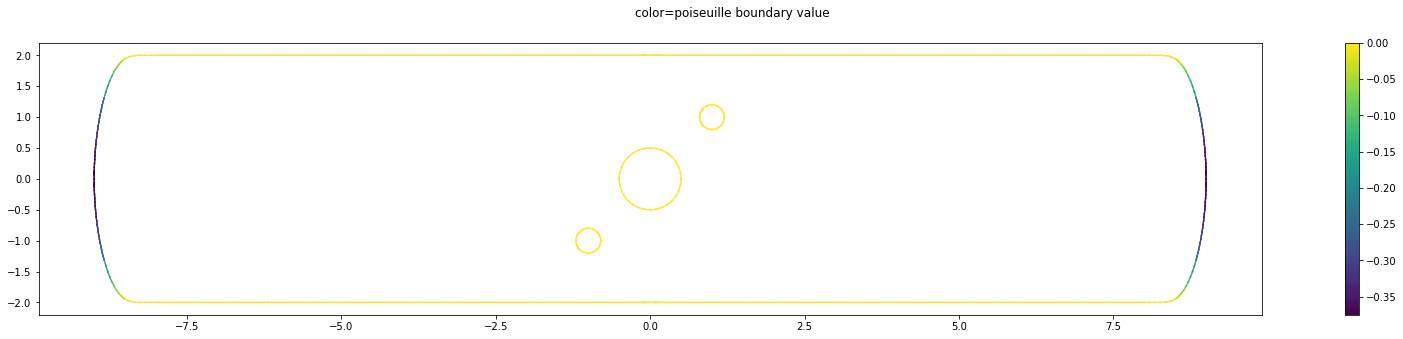

In [34]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(30,5))
fig.colorbar(ax.scatter(x, y,s=0.1,c=H2U(the_pipe.boundary_value(0))[:,0]))
ax.set_aspect('equal')
fig.suptitle('color=poiseuille boundary value')

In [35]:
xs = np.linspace(-8,8,400)
ys = np.linspace(-2,2,100)
xs,ys = np.meshgrid(xs,ys)

xs = xs
ys = ys

In [36]:
m = Path(np.array((the_pipe.exterior_boundary.t.real, the_pipe.exterior_boundary.t.imag)).T).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
for ci in c:
    pts = np.array([ci.t.real,ci.t.imag]).T
    pts = ((pts - ci.aff_trans.b))*1.05 + ci.aff_trans.b
    m &= ~Path(pts).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
m = m.reshape(xs.shape)
m &= (np.abs(xs) < 7.94)
m &= np.abs(ys) < 1.94

In [37]:
U = the_pipe.velocity(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [38]:
p = the_pipe.pressure(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [39]:
u = np.zeros_like(xs)
v = np.zeros_like(xs)
pressure = np.zeros_like(xs)

In [40]:
u[m] = U[:,0]
v[m] = U[:,1]
pressure[m] = p
pressure[~m] = np.nan
u[~m] = np.nan
v[~m] = np.nan

Text(0.5, 0.98, 'color=velocity magnitude, streamlines=direction of flow')

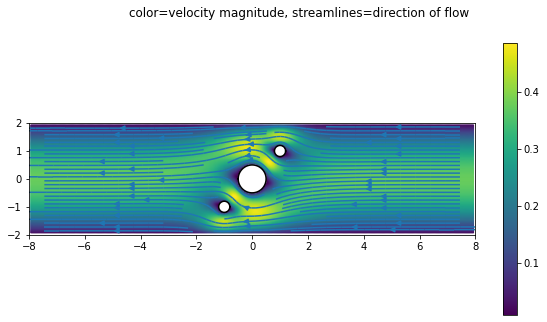

In [41]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=1,c=np.sqrt(u**2+v**2)))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >8)

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color=velocity magnitude, streamlines=direction of flow')

In [42]:
np.sum(b1.dt/(b1.t - b1.z))/(2j*np.pi) - 1

3.533949646070574e-17j

In [43]:
for b in the_pipe.boundaries:
    print(np.sum(b.dt/(b.t - b.z))/(2j*np.pi))

(1+3.533949646070574e-17j)
(-1-4.417437057588218e-18j)
(-0.9999999999999998-0j)
(-1+8.834874115176436e-18j)
